In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from matplotlib.ticker import MultipleLocator

import nn_model.globals
from response_analyzer import ResponseAnalyzer


In [2]:
# Interactive function to update the plot
def plot_neuron_activities(example_idx, predictions, targets, neuron_start=0, neurons_to_show=10, save_fig=False):
    # Define the main 2x2 grid figure
    fig, big_axes = plt.subplots(2, 2, figsize=(15, neurons_to_show*6))
    fig.suptitle(f'Overlayed Neuron Activities for Each Layer (Example {example_idx})', y=1.02)

    # Flatten the big_axes array for easy access
    big_axes = big_axes.flatten()

    # Loop over each layer and plot in a separate subplot grid cell
    for idx, (layer_name, pred_data) in enumerate(predictions.items()):
        # Select data for the specific example
        target_data = targets[layer_name][example_idx]  # Shape: (time, neurons)
        pred_data = pred_data[example_idx]              # Shape: (time, neurons)

        # Plot neurons within the selected range
        for neuron_idx in range(neuron_start, min(neuron_start + neurons_to_show, pred_data.shape[1])):
            ax = fig.add_subplot(2 * neurons_to_show, 2, (1 + (idx % 2) + (idx // 2) * (neurons_to_show * 2) + (neuron_idx - neuron_start) * 2))
            
            sns.lineplot(x=np.arange(pred_data.shape[0]), y=pred_data[:, neuron_idx], ax=ax, label='Prediction', color='blue')
            sns.lineplot(x=np.arange(target_data.shape[0]), y=target_data[:, neuron_idx], ax=ax, label='Target', color='red')
            
            # Set title and labels
            if neuron_idx == neuron_start:
                ax.set_title(f'Layer: {layer_name}')
            ax.set_ylabel(f'Neuron {neuron_idx}')
            ax.set_ylim(-0.2, 1.2)  # Set y-axis range from 0 to 1

        # Set x-axis label only for the bottom-most neuron in each layer plot
        ax.set_xlabel('Time')

    # Adjust layout and show the final figure
    plt.tight_layout(pad=0.01)
    if save_fig:
        plt.savefig(f"plot_images/neuron_activities_example_{example_idx}.png", bbox_inches="tight")
    else:
        plt.show()


In [28]:
# Load the pickle file
# file_path = "evaluation_results_old/neuron_responses/model-25_step-20_lr-1e-05_complex_residual_False.pkl"  # Replace with the path to your pickle file
# file_path = "evaluation_results/neuron_responses/model-10_step-20_lr-1e-05_complex_residual-False_neuron-layers-5_neuron-size-10.pkl"
# with open(file_path, 'rb') as f:
#     data = pickle.load(f)

# # Extract predictions and targets dictionaries
# predictions = data['predictions']
# targets = data['targets']

# Select the example index you want
# example_idx = 4

# for i in range(10):
#     plot_neuron_activities(i, neurons_to_show=10), #save_fig=True)

In [6]:
train_spikes_dir = f"/home/beinhaud/diplomka/mcs-source/dataset/train_dataset/compressed_spikes/trimmed/size_{nn_model.globals.TIME_STEP}"
test_spikes_dir = f"/home/beinhaud/diplomka/mcs-source/dataset/test_dataset/compressed_spikes/trimmed/size_{nn_model.globals.TIME_STEP}"

responses_dir = "/home/beinhaud/diplomka/mcs-source/evaluation_tools/evaluation_results/full_evaluation_results/model-10_step-20_lr-1e-05_simple_residual-False_neuron-layers-5_neuron-size-10"
neuron_ids_path = "/home/beinhaud/diplomka/mcs-source/evaluation_tools/evaluation_subsets/neurons/model_size_10_subset_10.pkl"
images_ids_path = "/home/beinhaud/diplomka/mcs-source/evaluation_tools/evaluation_subsets/experiments/experiments_subset_10.pkl"

response_analyzer = ResponseAnalyzer(train_spikes_dir, test_spikes_dir, responses_dir, neuron_ids_path)#, images_ids_path)

In [30]:
# histogram_data = response_analyzer.create_spikes_histogram(subset=3)
# hist_counts, bin_edges = response_analyzer.create_spikes_histogram(subset=90)


In [31]:
# hist_counts, bin_edges

In [32]:
# # Plot the histogram

# # Calculate the total number of neurons (sum of all counts)
# total_neurons = hist_counts.sum()

# # Normalize the histogram to get probabilities
# hist_probabilities = hist_counts / total_neurons
# plt.figure(figsize=(10, 6))
# plt.bar(bin_edges[:-1], hist_probabilities, width=np.diff(bin_edges), align="edge", edgecolor="k")
# plt.xlabel("Number of Spikes")
# plt.ylabel("Probability of spike number")
# plt.title("Number of Neuron Spikes Distribution")
# # plt.show()
# plt.savefig(f"plot_images/num_spikes_histogram/histogram_size_{nn_model.globals.TIME_STEP}.png")

In [16]:

def plot_predictions_vs_targets(data, y_range=(-0.1, 0.5), save_fig: str=""):
    predictions = data['predictions']
    targets = data['targets']
    
    num_layers = len(predictions)  # Assuming both 'predictions' and 'targets' have same keys
    fig, axs = plt.subplots(num_layers, 1, figsize=(10, 5 * num_layers))
    
    # If there's only one layer, we ensure axs is a list for easier handling
    if num_layers == 1:
        axs = [axs]
    
    # Iterate over each layer
    for idx, layer in enumerate(predictions.keys()):
        pred_tensor = predictions[layer]#[:-4]
        target_tensor = targets[layer]#[:-4]
        
        # Ensure tensors are detached and converted to numpy for plotting
        pred_values = pred_tensor.detach().numpy()
        target_values = target_tensor.detach().numpy()
        
        # Plot predictions and targets for each layer
        axs[idx].plot(np.insert(pred_values, 0, target_values[0], axis=0), label='Predictions', color='blue')
        axs[idx].plot(target_values, label='Targets', color='red')#, linestyle='--')
        
        
        # Set fixed y-axis range
        axs[idx].set_ylim(*y_range)#-0.1, 0.6)
        
        axs[idx].axvline(x=2, color='green', linestyle='--', label='Blank/Stimuli')
        axs[idx].axvline(x=31, color='green', linestyle='--', label='Stimuli/Blank')
        
        # Adding titles and labels
        axs[idx].set_title(f"Layer {layer} - Mean neural response through time")
        axs[idx].set_xlabel("Time")
        axs[idx].set_ylabel("Mean response")
        axs[idx].legend()

    plt.tight_layout()
    plt.show()
    # plt.savefig(f"plot_images/num_spikes_histogram/temporal_spikes_layer_distribution_size_{nn_model.globals.TIME_STEP}.png")


In [5]:
def plot_input_in_time(data, y_range=(-0.1, 0.6), save_fig: str=""):
    # predictions = data
    targets = data
    
    num_layers = len(targets)  # Assuming both 'predictions' and 'targets' have same keys
    fig, axs = plt.subplots(num_layers, 1, figsize=(10, 5 * num_layers))
    
    # If there's only one layer, we ensure axs is a list for easier handling
    if num_layers == 1:
        axs = [axs]
    
    # Iterate over each layer
    for idx, layer in enumerate(targets.keys()):
        pred_tensor = targets[layer]#[:-8]
        # target_tensor = targets[layer][:-4]
        
        # Ensure tensors are detached and converted to numpy for plotting
        pred_values = pred_tensor.detach().numpy()
        # target_values = target_tensor.detach().numpy()
        
        # Plot predictions and targets for each layer
        axs[idx].plot(pred_values, label='Predictions', color='blue')
        # axs[idx].plot(target_values, label='Targets', color='red')#, linestyle='--')
        
        
        # Set fixed y-axis range
        # axs[idx].set_ylim(*y_range)#-0.1, 0.6)
        
        # axs[idx].axvline(x=6, color='green', linestyle='--', label='Blank/Stimuli')
        # axs[idx].axvline(x=62, color='green', linestyle='--', label='Stimuli/Blank')
        
        # Adding titles and labels
        axs[idx].set_title(f"Layer {layer} - Mean neural response through time")
        axs[idx].set_xlabel("Time")
        axs[idx].set_ylabel("Mean response")
        axs[idx].legend()

    plt.tight_layout()
    plt.show()
    # plt.savefig(f"plot_images/num_spikes_histogram/temporal_input_layer_distribution_size_{nn_model.globals.TIME_STEP}.png")


In [35]:
response_analyzer.get_original_data_mean_over_time(subset=3, include_output=True, process_test=False)

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 3/5000 [00:01<51:44,  1.61it/s]


In [36]:
response_analyzer.mean_input_layer_responses


{'X_ON': tensor([0.0344, 0.0345, 0.0448, 0.0667, 0.0770, 0.0790, 0.0778, 0.0757, 0.0729,
         0.0691, 0.0653, 0.0614, 0.0583, 0.0556, 0.0537, 0.0522, 0.0519, 0.0516,
         0.0514, 0.0512, 0.0512, 0.0512, 0.0510, 0.0510, 0.0513, 0.0510, 0.0512,
         0.0512, 0.0512, 0.0509, 0.0514, 0.0509, 0.0512, 0.0512, 0.0508, 0.0512,
         0.0510, 0.0511, 0.0510, 0.0513, 0.0507, 0.0509, 0.0512, 0.0510, 0.0512,
         0.0511, 0.0510, 0.0512, 0.0510, 0.0511, 0.0510, 0.0512, 0.0511, 0.0513,
         0.0512, 0.0510, 0.0298, 0.0326, 0.0346, 0.0348, 0.0350, 0.0350, 0.0348,
         0.0346, 0.0349, 0.0349, 0.0347, 0.0346, 0.0350, 0.0347, 0.0349]),
 'X_OFF': tensor([0.0149, 0.0161, 0.0260, 0.0522, 0.0654, 0.0683, 0.0671, 0.0645, 0.0613,
         0.0574, 0.0525, 0.0486, 0.0440, 0.0411, 0.0387, 0.0376, 0.0366, 0.0360,
         0.0359, 0.0356, 0.0360, 0.0360, 0.0356, 0.0355, 0.0356, 0.0358, 0.0358,
         0.0358, 0.0358, 0.0359, 0.0359, 0.0358, 0.0355, 0.0358, 0.0358, 0.0360,
         0.0357, 

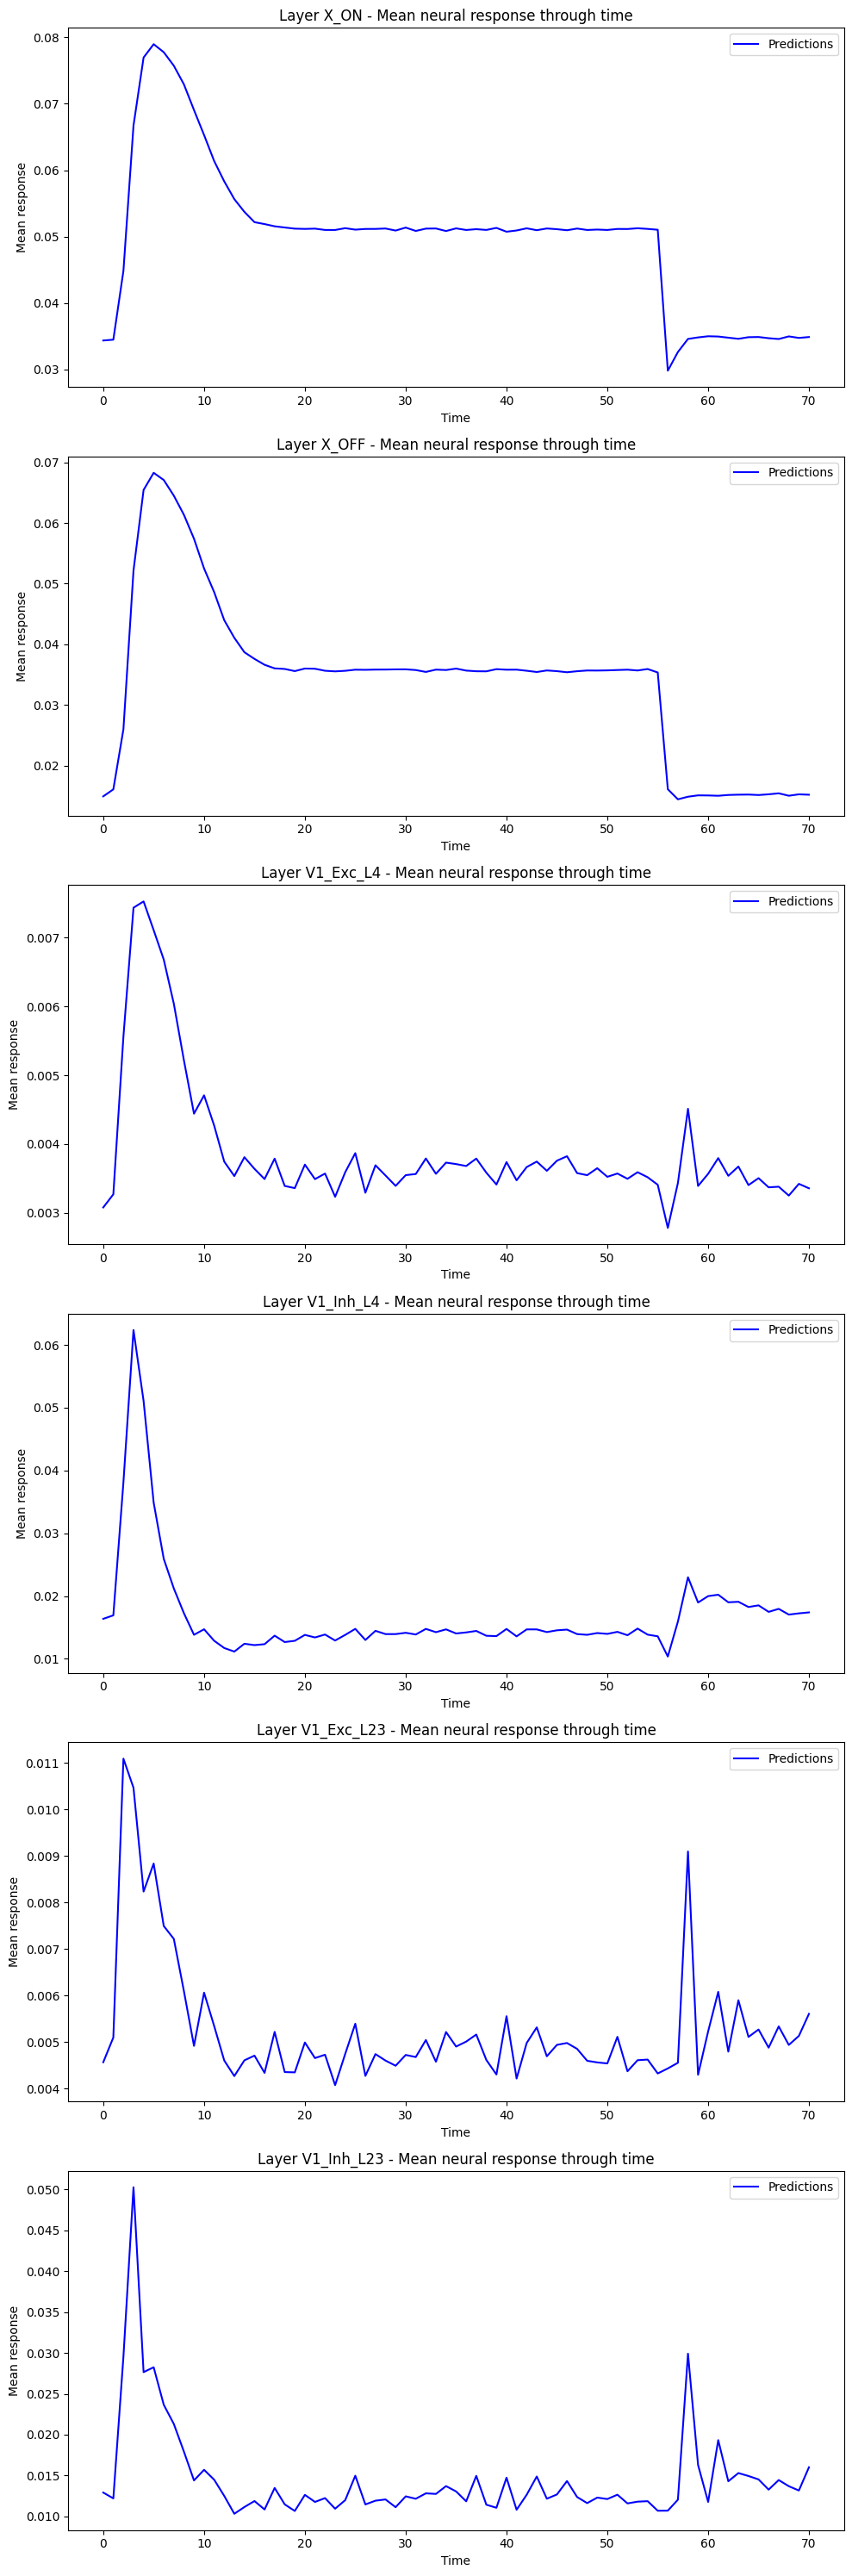

In [37]:
# plot_input_in_time(response_analyzer.mean_input_layer_responses, y_range=(0, 1.8))

100%|██████████| 90/90 [00:03<00:00, 24.59it/s]


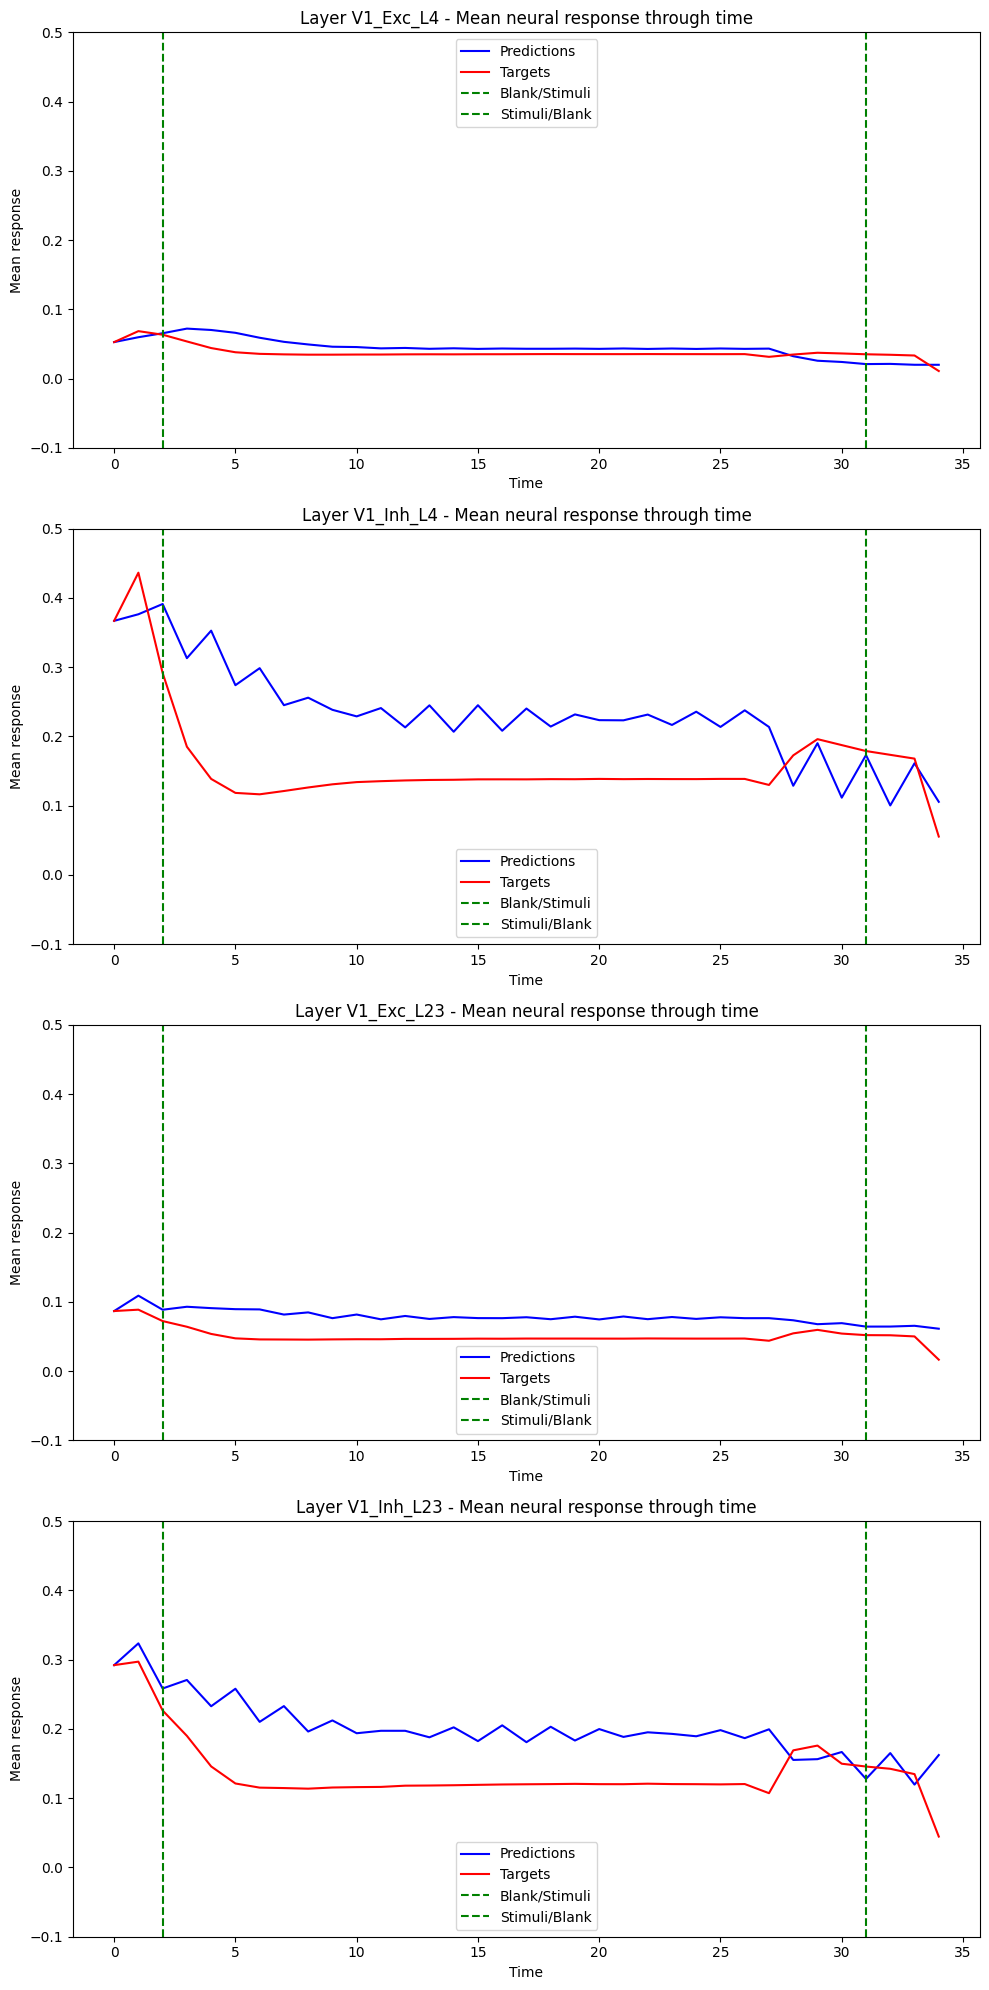

In [17]:
response_analyzer.get_mean_from_evaluated_data()


plot_predictions_vs_targets(response_analyzer.mean_layer_responses)